In [228]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.graphics.tsaplots as snt
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR

# loading data

In [199]:

df = pd.read_csv('/content/dataset_final.csv', parse_dates=['date'], index_col=['date'])
df = df.drop('Unnamed: 0', axis=1)
df.head()

,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,btc_google_search,btc_dr,gold_dr,oil_dr,sp500_dr,BVOL,GVOL,OVOL,VIX
date,,,,,,,,,,,,,,
2015-01-15,211.91,1352.8,46.37,1992.67,102309.0,3,0.568670,0.021141,-0.044705,-0.009291,0.853974,0.344132,0.344950,22.39
2015-01-16,199.46,1364.9,48.49,2019.42,104699.0,3,-0.060548,0.008905,0.044705,0.013335,0.857286,0.348453,0.346061,20.95
2015-01-20,208.00,1377.4,46.79,2022.55,98485.0,3,0.041924,0.009116,-0.035688,0.001549,0.857176,0.348518,0.346647,19.89
2015-01-21,225.51,1378.4,47.85,2032.12,98485.0,3,0.080826,0.000726,0.022402,0.004720,0.893605,0.350149,0.347336,18.85
2015-01-22,226.32,1390.2,45.93,2063.15,93698.0,3,0.003585,0.008524,-0.040953,0.015154,0.904949,0.351242,0.343230,16.40


# visualization of series

In [30]:
def tsplot2(y, title, lags = None, figsize=(12,8)):
  fig = plt.figure(figsize=figsize)
  layout = (2,2)
  ts_ax = plt.subplot2grid(layout, (0,0))
  hist_ax = plt.subplot2grid(layout, (0,1))
  acf_ax = plt.subplot2grid(layout, (1,0))
  pacf_ax = plt.subplot2grid(layout, (1,1))

  y.plot(ax = ts_ax)
  ts_ax.set_title(title, fontsize = 14, fontweight = 'bold')
  y.plot(ax = hist_ax, kind = 'hist')
  hist_ax.set_title('Histogram')
  snt.plot_acf(y, lags = lags, ax = acf_ax)
  snt.plot_pacf(y, lags = lags, ax = pacf_ax)

  [ax.set_xlim(0) for ax in [acf_ax,pacf_ax]]
  sns.despine()
  plt.tight_layout()
  return ts_ax, acf_ax, pacf_ax

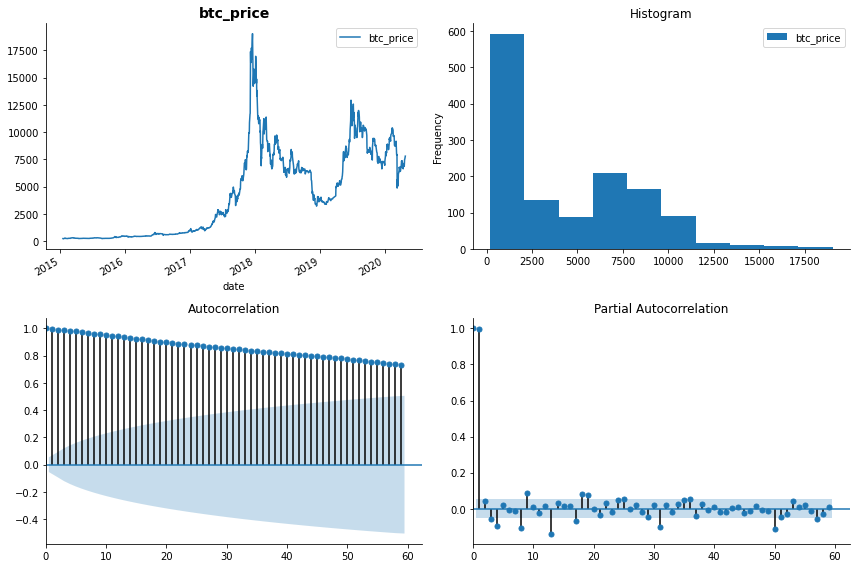

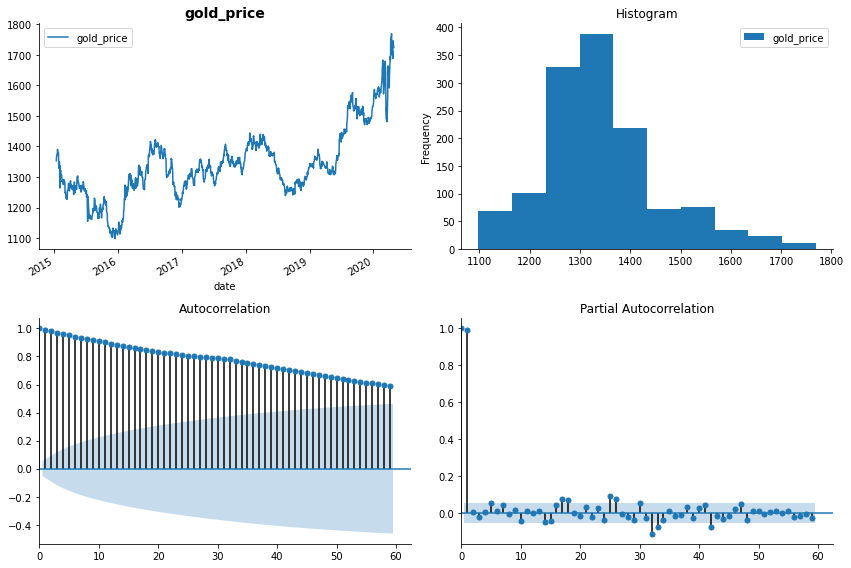

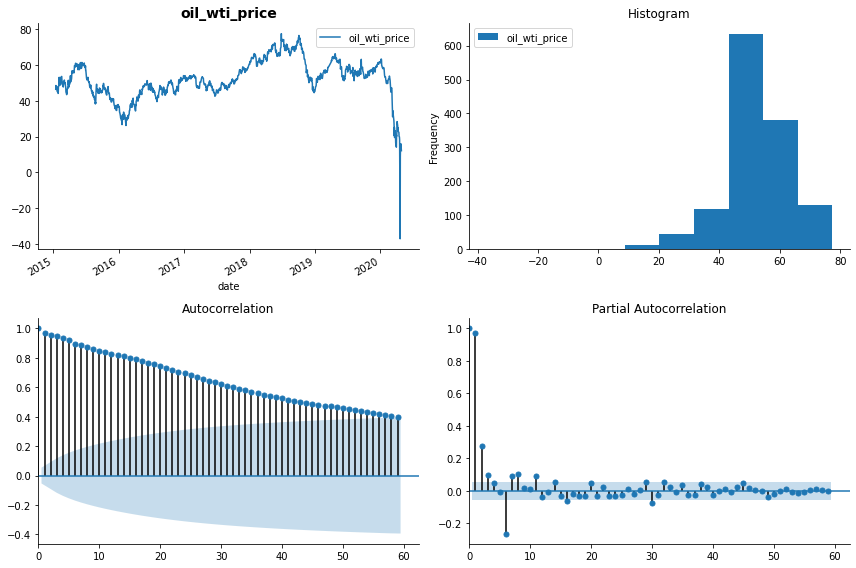

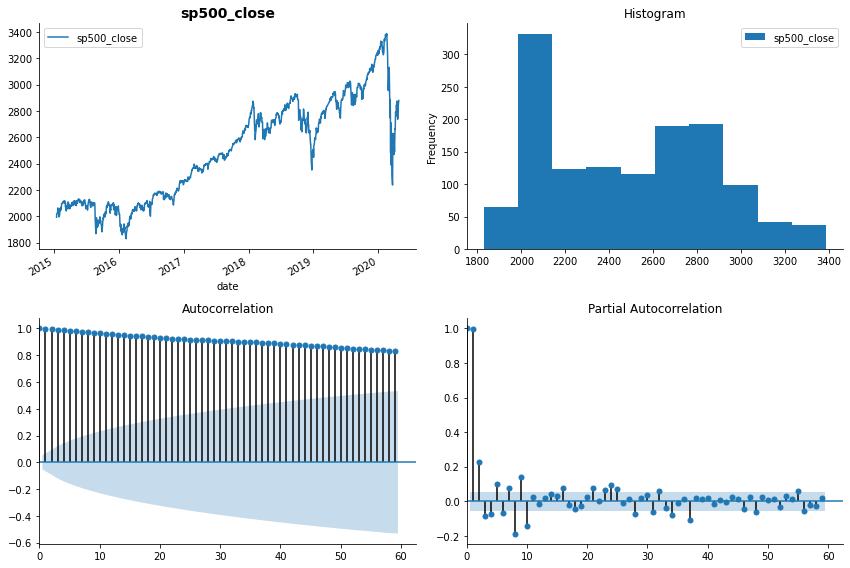

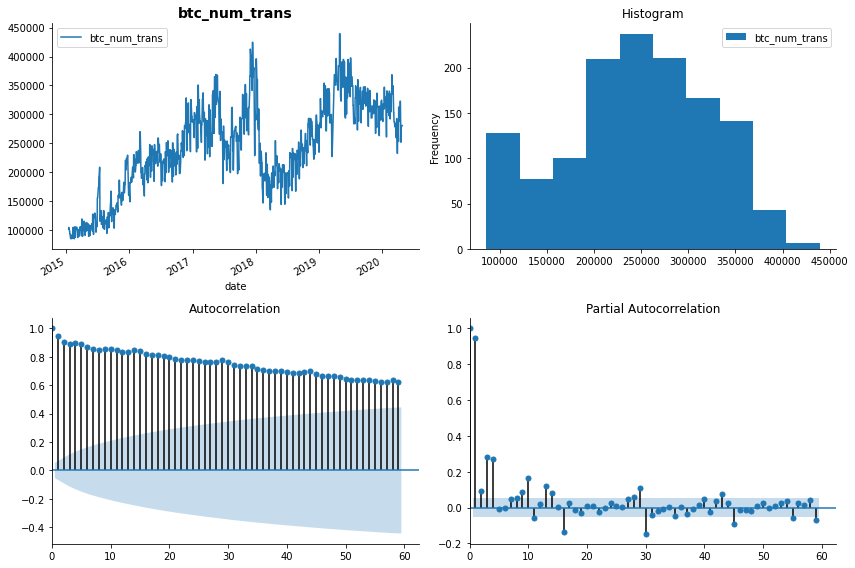

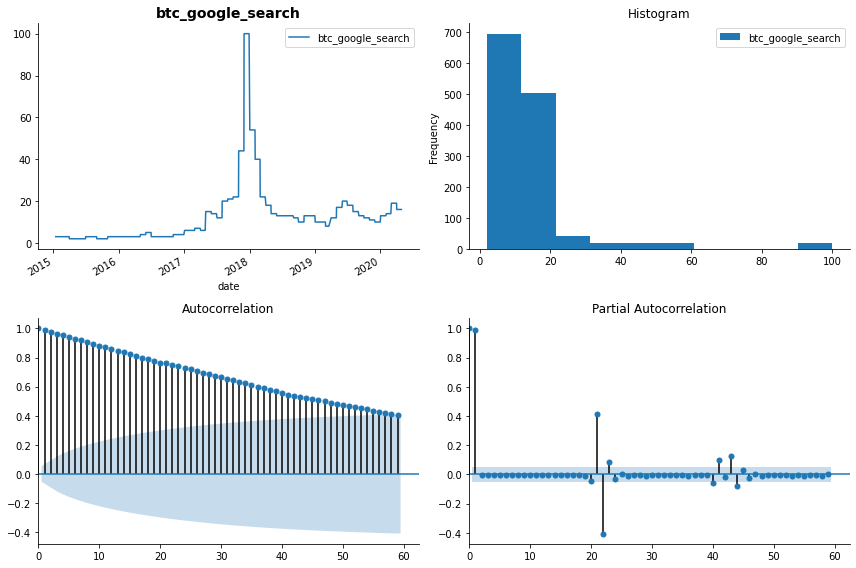

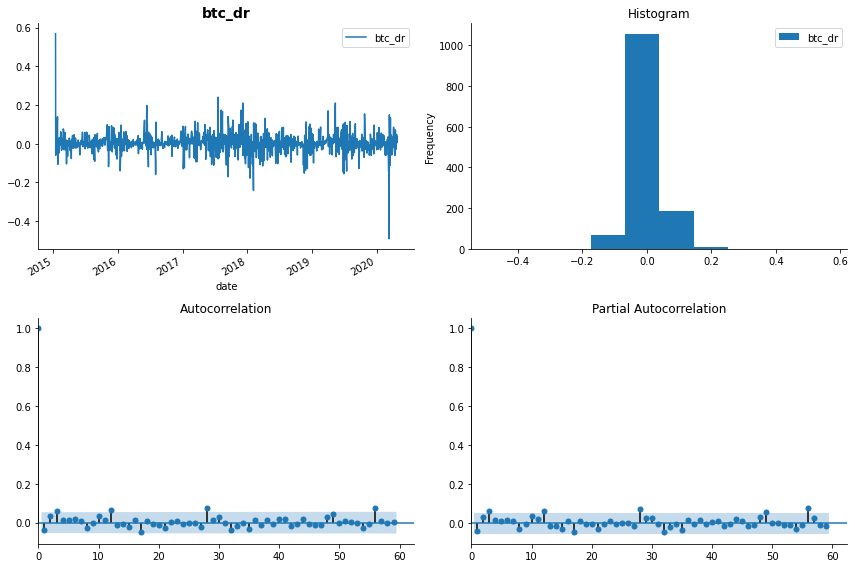

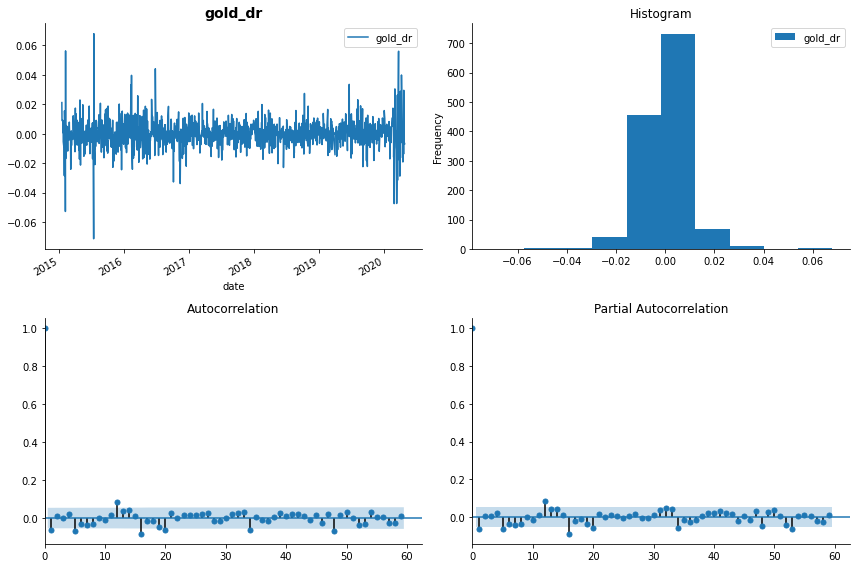

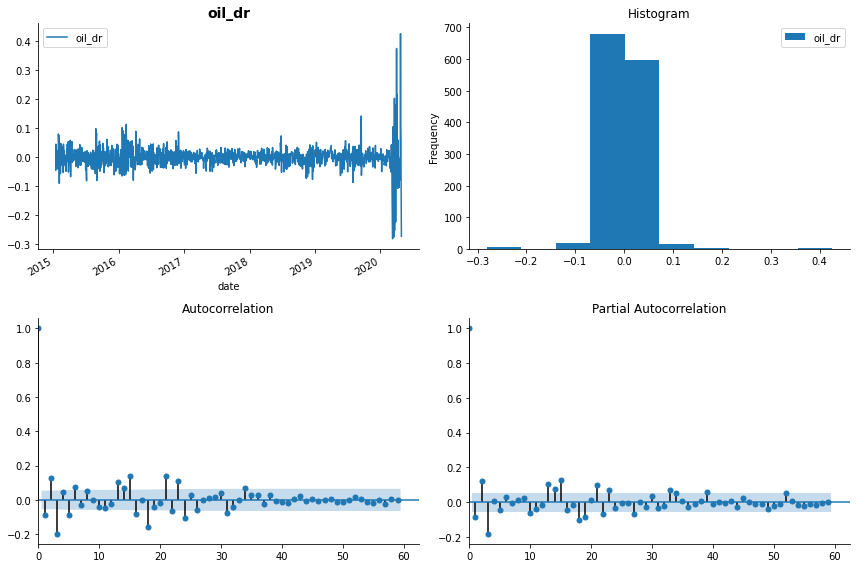

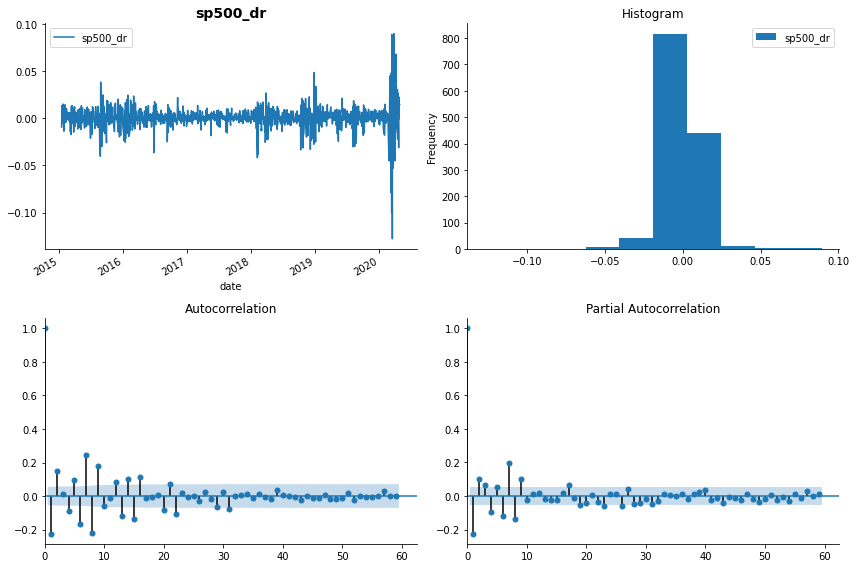

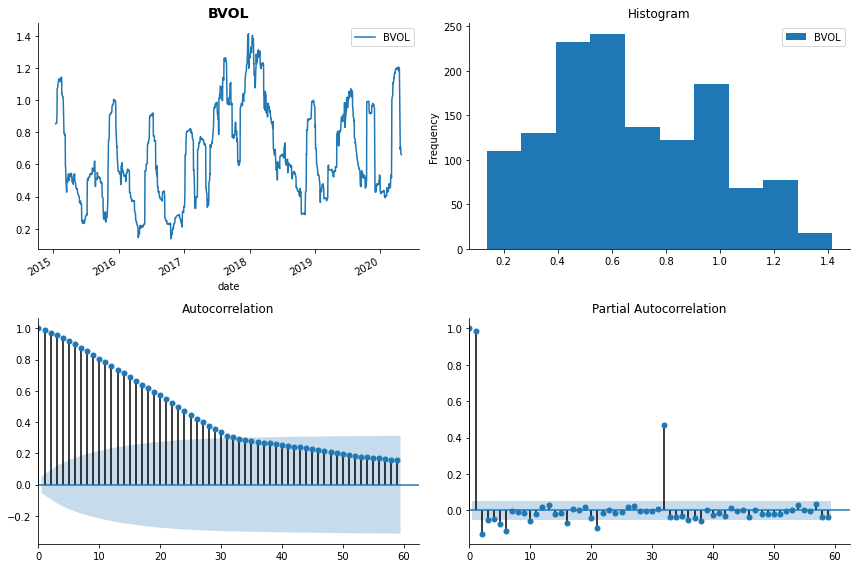

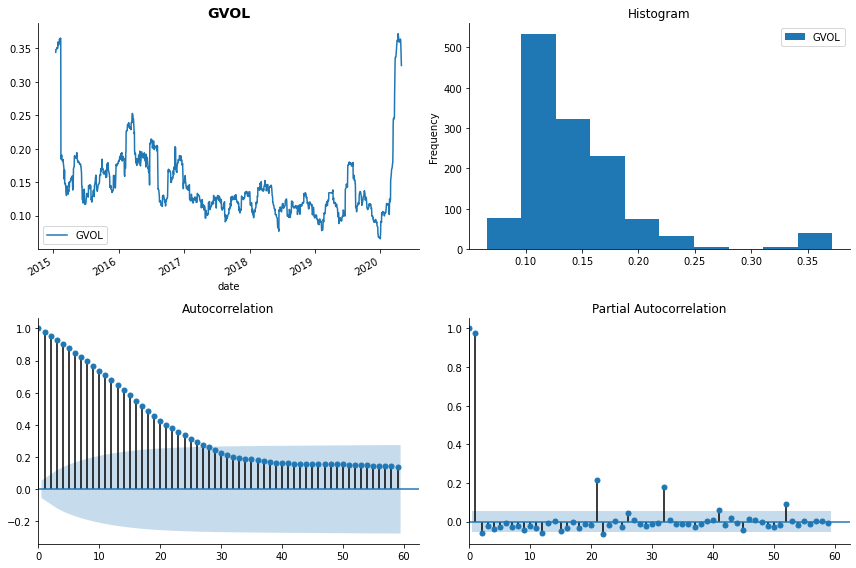

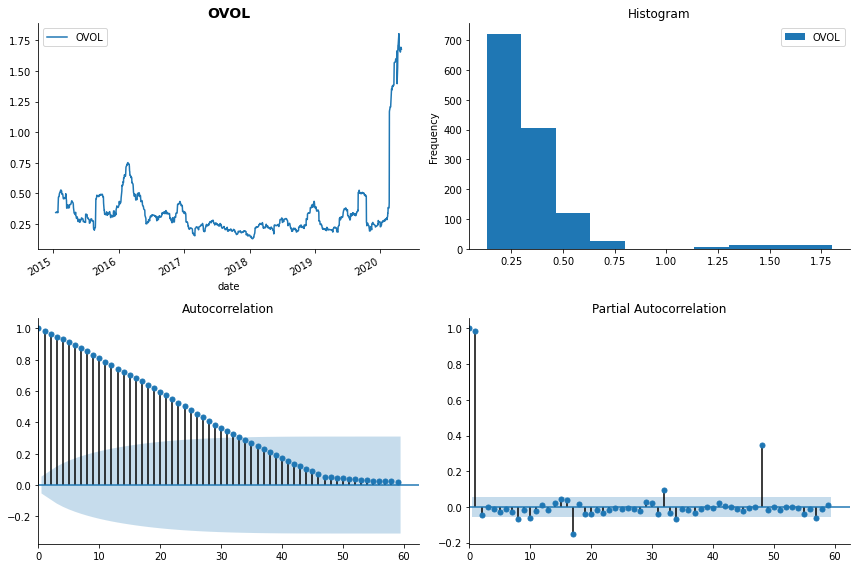

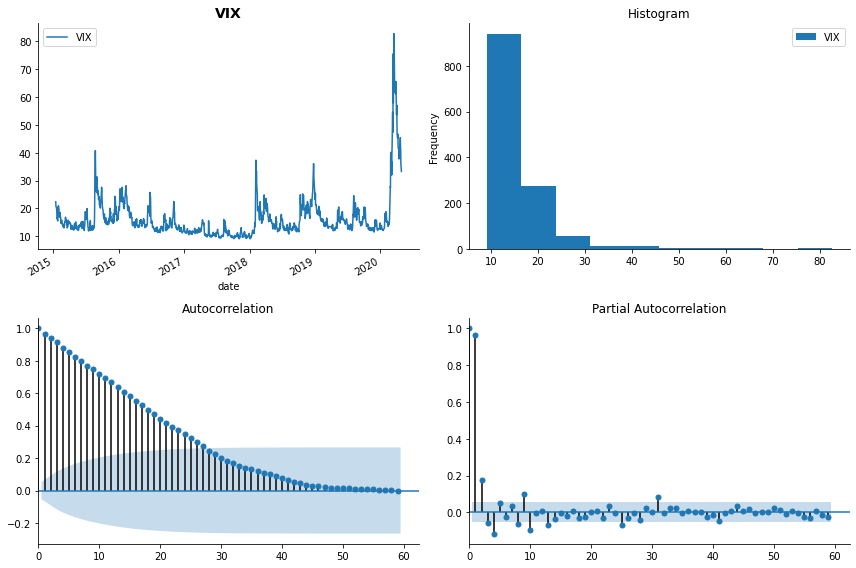

In [40]:
col = ['btc_price', 'gold_price', 'oil_wti_price', 'sp500_close',
       'btc_num_trans', 'btc_google_search', 'btc_dr', 'gold_dr', 'oil_dr',
       'sp500_dr', 'BVOL', 'GVOL', 'OVOL', 'VIX']
for i in col:
  tsplot2(df[[i]], i, range(0,60),(12,8))
  print()


# Normality check

In [122]:
for i in df.columns:
  stat,p = stats.normaltest(df[[i]])
  print()
  print(i)
  print("Statistics = %.3f, p=%.3f" % (stat,p))
  alpha = 0.05
  if p> alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
  else:
    print('Data looks non-Gaussian (reject null hypothesis)')


btc_price
Statistics = 100.133, p=0.000
Data looks non-Gaussian (reject null hypothesis)

gold_price
Statistics = 143.748, p=0.000
Data looks non-Gaussian (reject null hypothesis)

oil_wti_price
Statistics = 254.212, p=0.000
Data looks non-Gaussian (reject null hypothesis)

sp500_close
Statistics = 426.641, p=0.000
Data looks non-Gaussian (reject null hypothesis)

btc_num_trans
Statistics = 56.829, p=0.000
Data looks non-Gaussian (reject null hypothesis)

btc_google_search
Statistics = 1064.098, p=0.000
Data looks non-Gaussian (reject null hypothesis)

btc_dr
Statistics = 395.818, p=0.000
Data looks non-Gaussian (reject null hypothesis)

gold_dr
Statistics = 255.210, p=0.000
Data looks non-Gaussian (reject null hypothesis)

oil_dr
Statistics = 612.372, p=0.000
Data looks non-Gaussian (reject null hypothesis)

sp500_dr
Statistics = 532.101, p=0.000
Data looks non-Gaussian (reject null hypothesis)

BVOL
Statistics = 142.622, p=0.000
Data looks non-Gaussian (reject null hypothesis)

GVOL

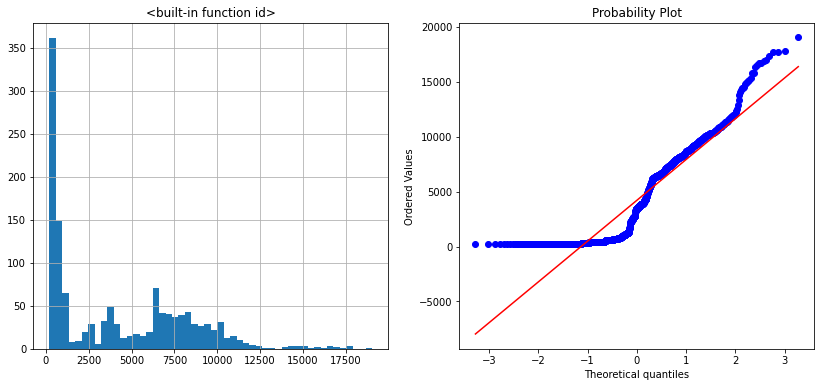

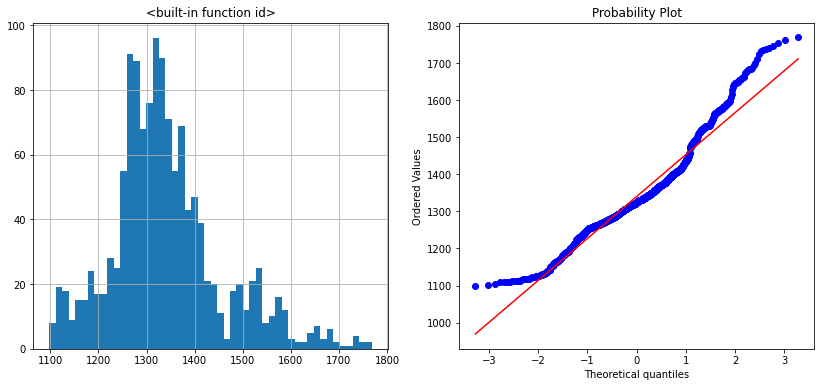

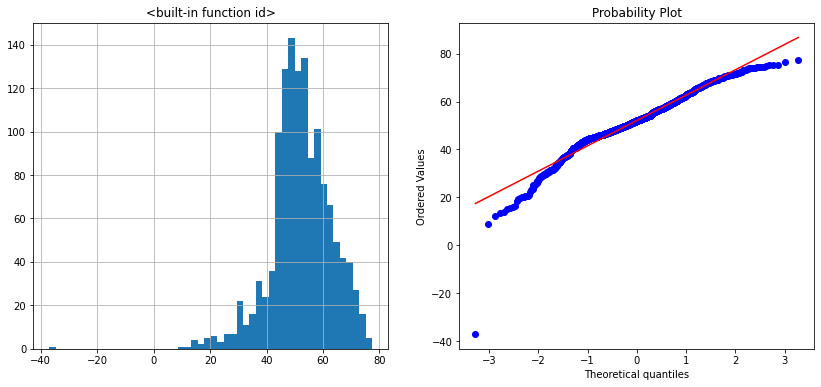

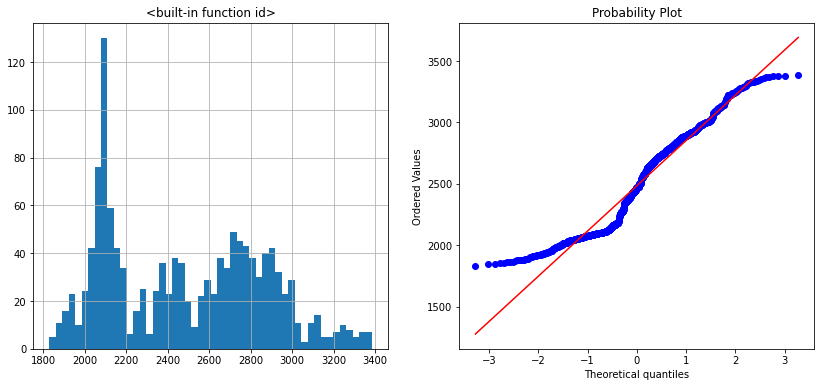

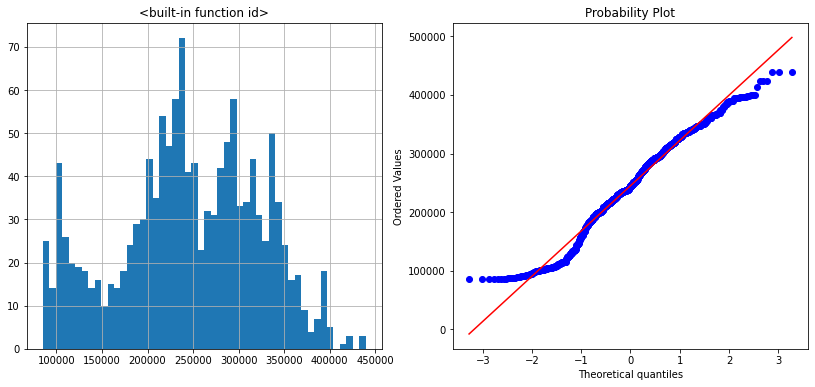

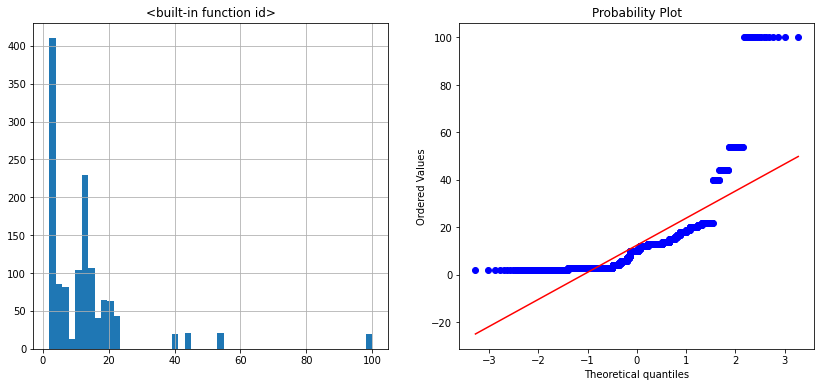

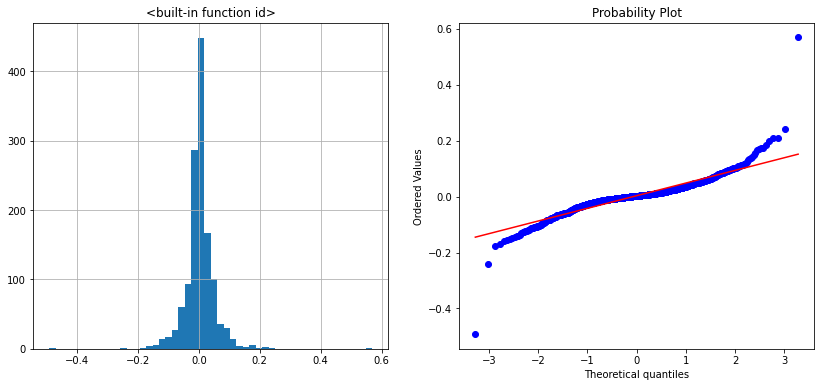

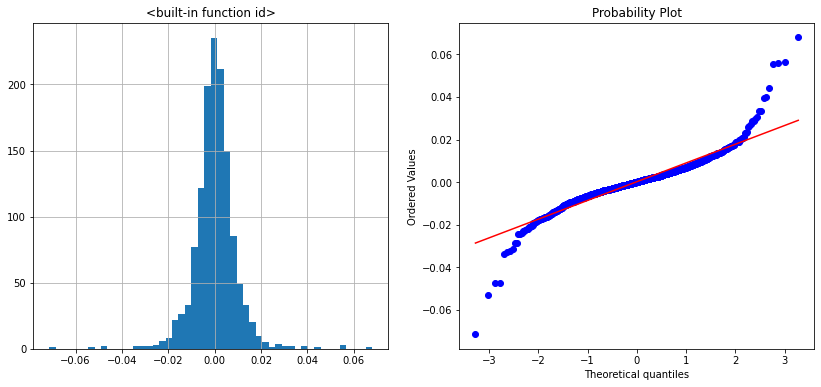

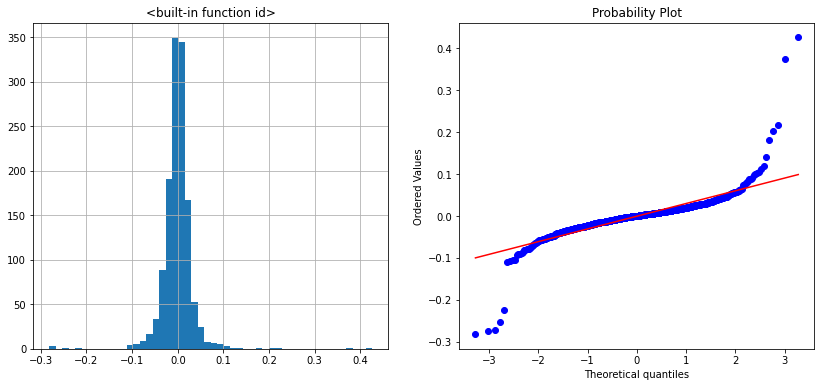

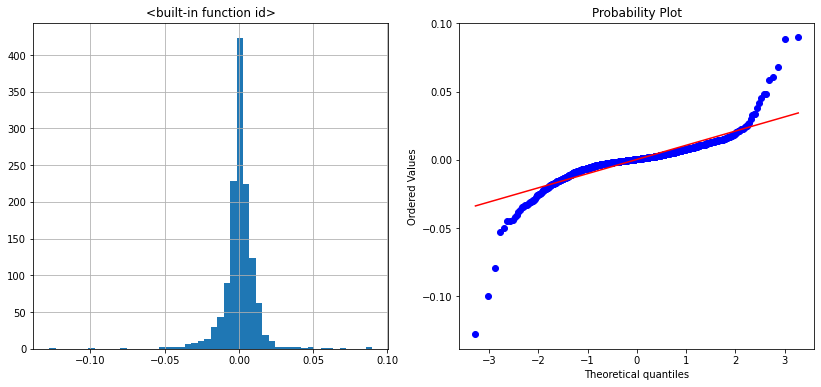

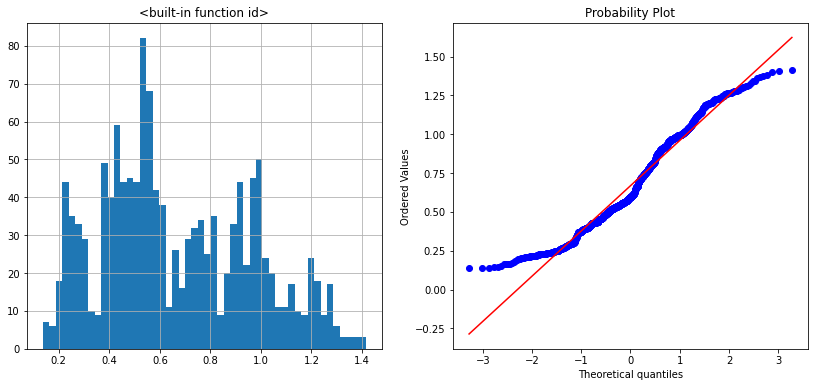

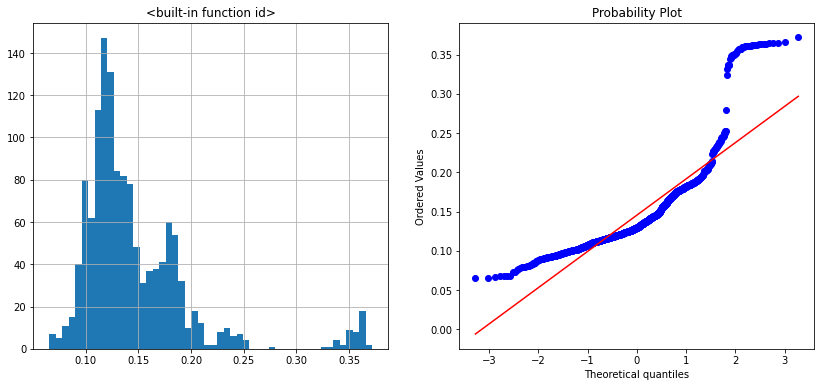

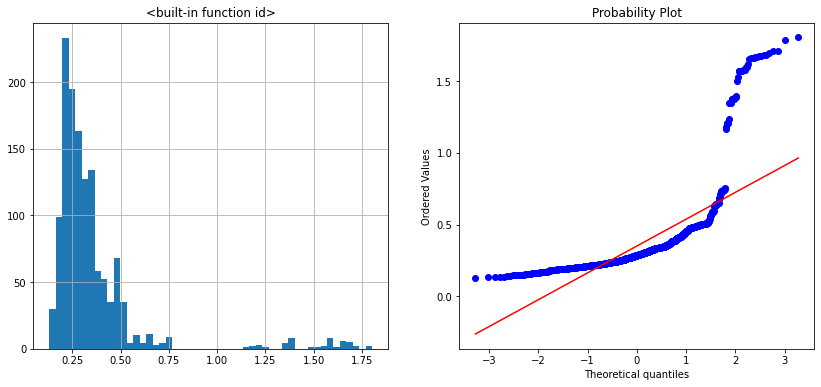

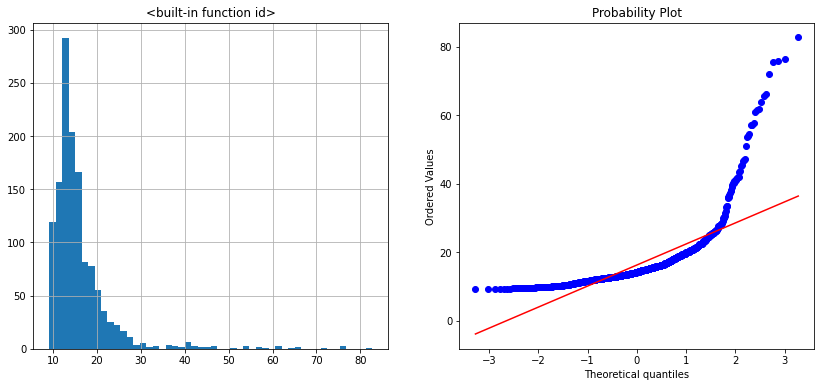

In [125]:
for i in df.columns:
  plt.figure(figsize=(14,6))
  plt.subplot(1,2,1)
  df[i].hist(bins=50)
  plt.title(id)
  plt.subplot(1,2,2)
  stats.probplot(df[i], plot=plt);
  df[i].describe().T

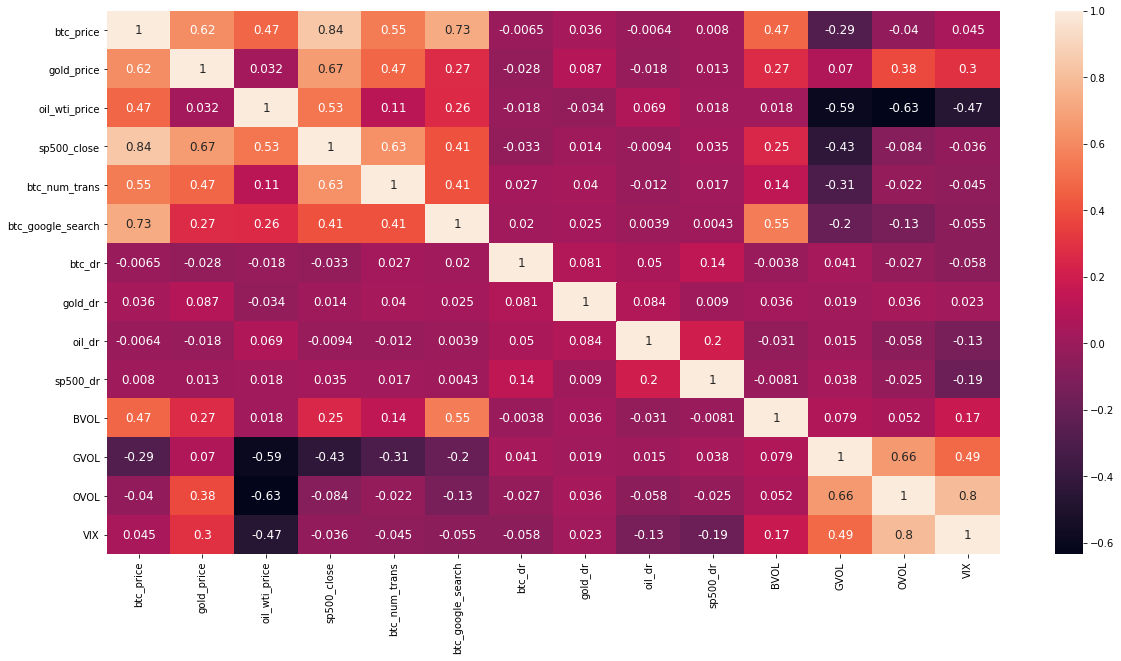

In [129]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, annot_kws={'size':12})
heat_map = plt.gcf()
heat_map.set_size_inches(20,10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize=10)
plt.show()

# Check for stationarity

In [200]:
def augmented_dickey_fuller_statistics(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [201]:
for i in col:
  print(i)
  augmented_dickey_fuller_statistics(df[i])

btc_price
ADF Statistic: -1.737825
p-value: 0.411737
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
gold_price
ADF Statistic: 0.274272
p-value: 0.976133
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
oil_wti_price
ADF Statistic: -1.272471
p-value: 0.641671
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
sp500_close
ADF Statistic: -1.539292
p-value: 0.513992
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
btc_num_trans
ADF Statistic: -2.402426
p-value: 0.141053
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
btc_google_search
ADF Statistic: -2.773782
p-value: 0.062118
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
btc_dr
ADF Statistic: -19.765146
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
gold_dr
ADF Statistic: -8.969992
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
oil_dr
ADF Statistic: -6.925795
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
sp500_dr
ADF Statistic: -1

# Convert stationary

In [204]:
term = ['btc_price',
 'gold_price',
 'oil_wti_price',
 'sp500_close',
 'btc_num_trans',
 'btc_google_search',
 'OVOL']

In [207]:
df_trans = pd.DataFrame()
for i in term:
  df_trans[[i]] = df[[i]].diff( ).dropna()

In [208]:
print('Augmented Dickey-Fuller Test: Btc Price Time Series')
augmented_dickey_fuller_statistics(df_trans['btc_price'])
print('Augmented Dickey-Fuller Test: Gold Price Time Series')
augmented_dickey_fuller_statistics(df_trans['gold_price'])
print('Augmented Dickey-Fuller Test: Oil Wti Price Time Series')
augmented_dickey_fuller_statistics(df_trans['oil_wti_price'])
print('Augmented Dickey-Fuller Test: SP500 Close Time Series')
augmented_dickey_fuller_statistics(df_trans['sp500_close'])
print('Augmented Dickey-Fuller Test: Btc number transaction Time Series')
augmented_dickey_fuller_statistics(df_trans['btc_num_trans'])
print('Augmented Dickey-Fuller Test: Btc google search Time Series')
augmented_dickey_fuller_statistics(df_trans['btc_google_search'])
print('Augmented Dickey-Fuller Test: OVOL Time Series')
augmented_dickey_fuller_statistics(df_trans['OVOL'])


Augmented Dickey-Fuller Test: Btc Price Time Series
ADF Statistic: -8.683301
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Augmented Dickey-Fuller Test: Gold Price Time Series
ADF Statistic: -9.289500
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Augmented Dickey-Fuller Test: Oil Wti Price Time Series
ADF Statistic: -6.702252
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Augmented Dickey-Fuller Test: SP500 Close Time Series
ADF Statistic: -10.740826
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Augmented Dickey-Fuller Test: Btc number transaction Time Series
ADF Statistic: -12.114717
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Augmented Dickey-Fuller Test: Btc google search Time Series
ADF Statistic: -7.933550
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Augmented Dickey-Fuller Test: OVOL Time Series
ADF Statistic: -11.003434
p-v

In [209]:
df.head()

,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,btc_google_search,btc_dr,gold_dr,oil_dr,sp500_dr,BVOL,GVOL,OVOL,VIX
date,,,,,,,,,,,,,,
2015-01-15,211.91,1352.8,46.37,1992.67,102309.0,3,0.568670,0.021141,-0.044705,-0.009291,0.853974,0.344132,0.344950,22.39
2015-01-16,199.46,1364.9,48.49,2019.42,104699.0,3,-0.060548,0.008905,0.044705,0.013335,0.857286,0.348453,0.346061,20.95
2015-01-20,208.00,1377.4,46.79,2022.55,98485.0,3,0.041924,0.009116,-0.035688,0.001549,0.857176,0.348518,0.346647,19.89
2015-01-21,225.51,1378.4,47.85,2032.12,98485.0,3,0.080826,0.000726,0.022402,0.004720,0.893605,0.350149,0.347336,18.85
2015-01-22,226.32,1390.2,45.93,2063.15,93698.0,3,0.003585,0.008524,-0.040953,0.015154,0.904949,0.351242,0.343230,16.40


In [210]:
df_trans.head()

,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,btc_google_search,OVOL
date,,,,,,,
2015-01-16,-12.45,12.1,2.12,26.75,2390.0,0.0,0.001111
2015-01-20,8.54,12.5,-1.70,3.13,-6214.0,0.0,0.000586
2015-01-21,17.51,1.0,1.06,9.57,0.0,0.0,0.000689
2015-01-22,0.81,11.8,-1.92,31.03,-4787.0,0.0,-0.004106
2015-01-23,8.68,-7.6,-0.67,-11.33,0.0,0.0,0.006684


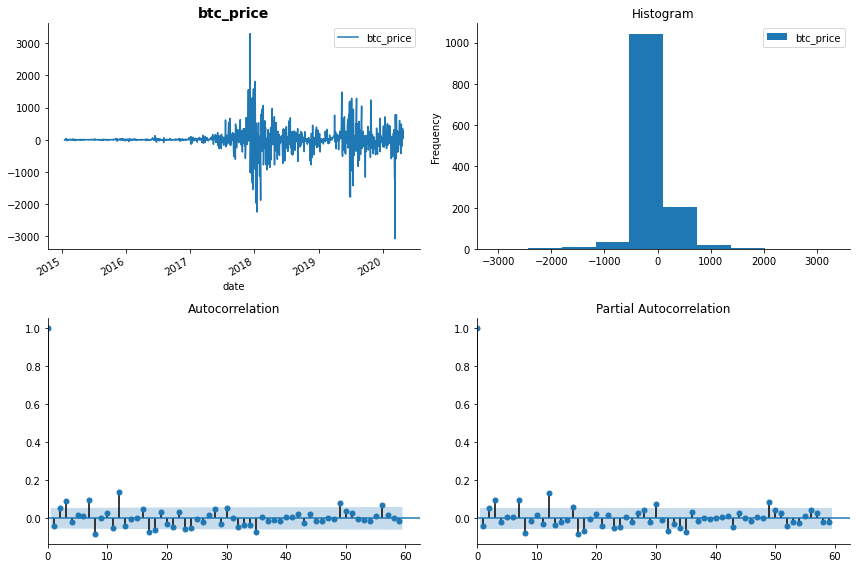

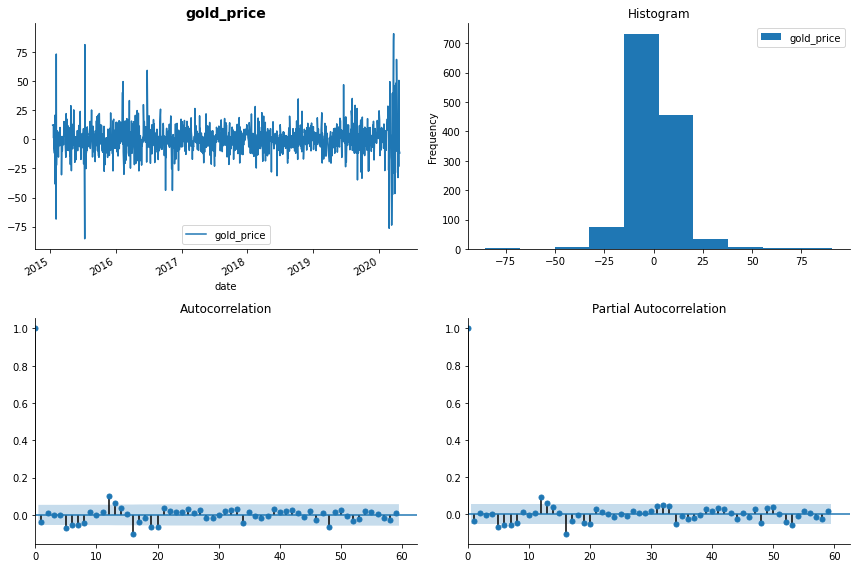

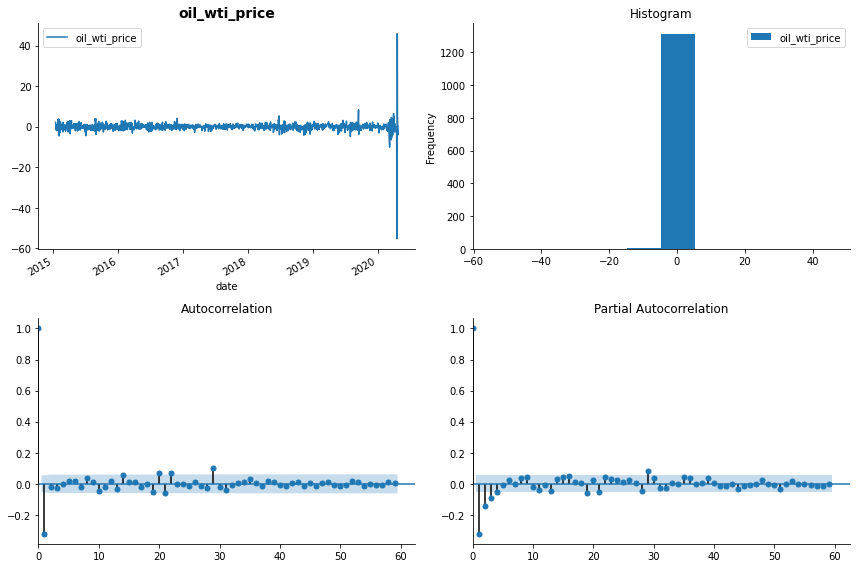

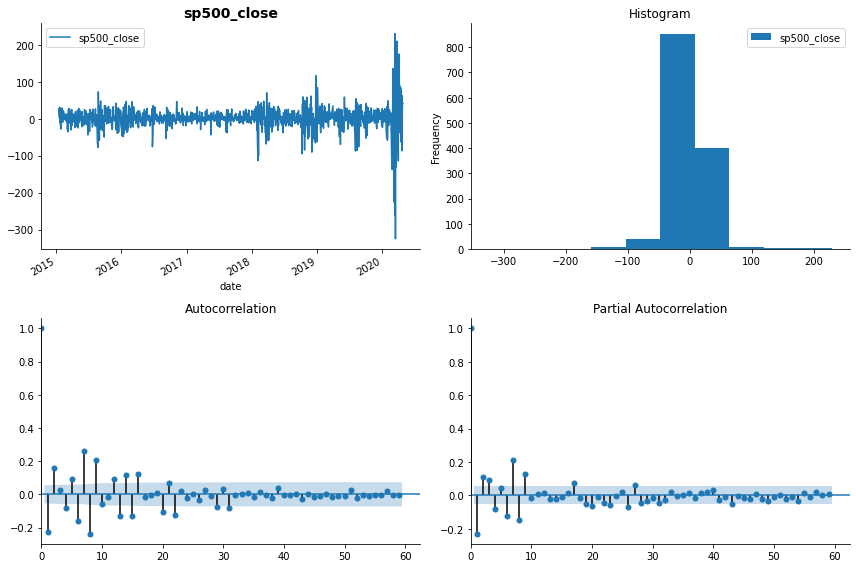

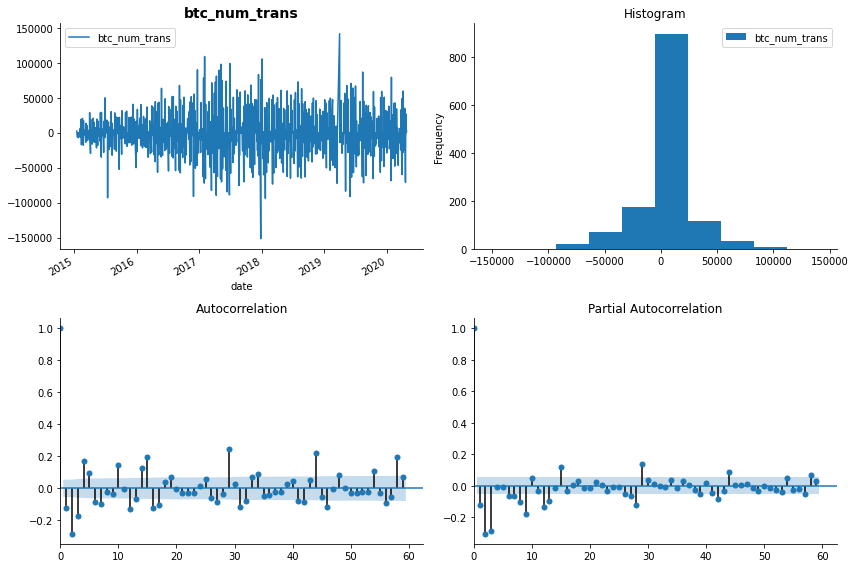

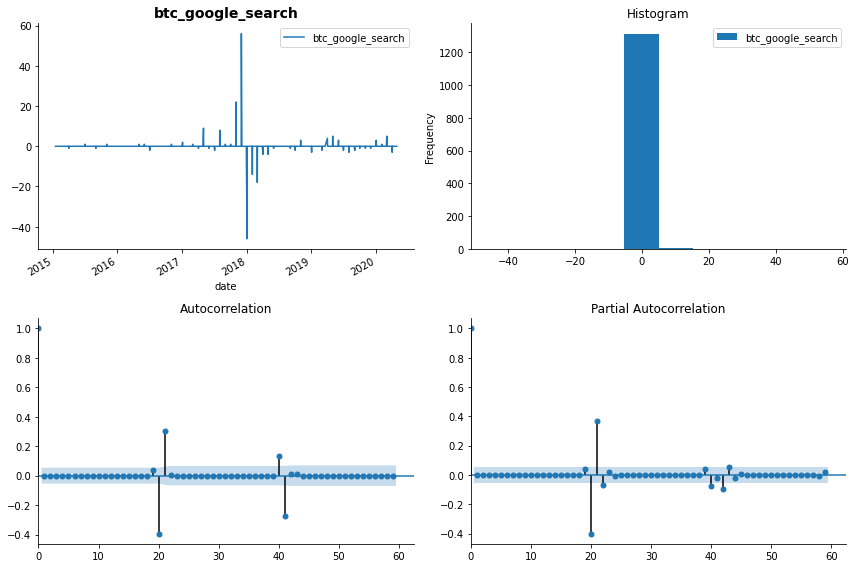

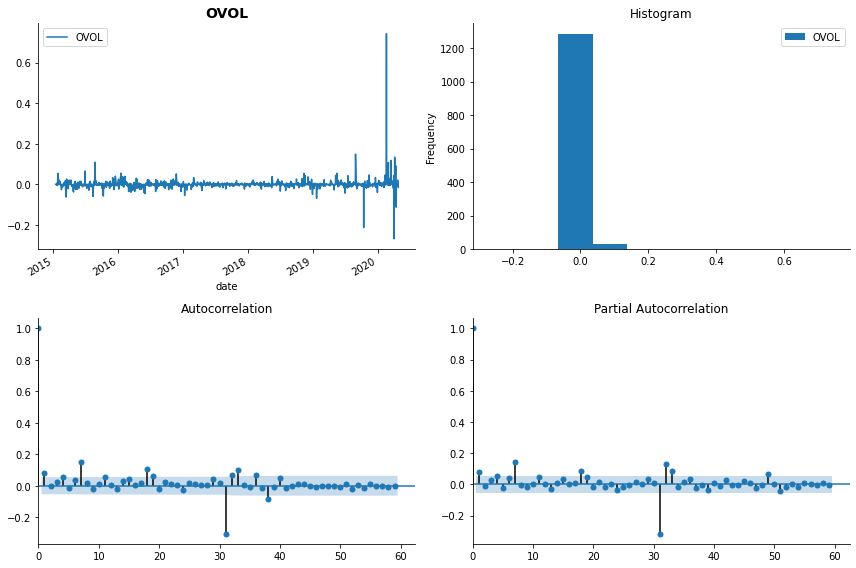

In [211]:
for i in term:
  tsplot2(df_trans[[i]], i, range(0,60),(12,8))

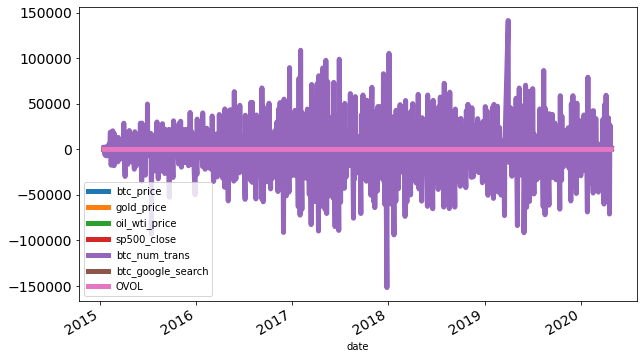

In [215]:
term = ['btc_price',
 'gold_price',
 'oil_wti_price',
 'sp500_close',
 'btc_num_trans',
 'btc_google_search',
 'OVOL']

df_trans[term].plot(figsize = (10,6) ,linewidth = 5, fontsize = 14)

# Already in stationary

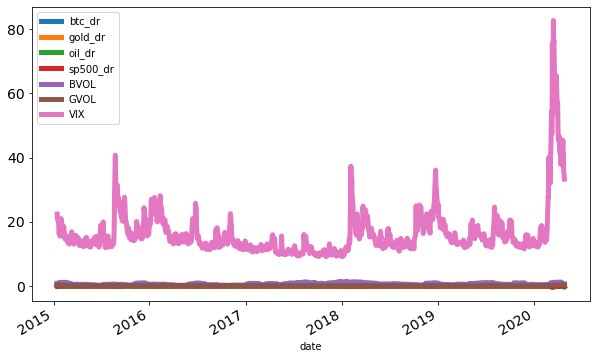

In [216]:
term = ['btc_dr', 'gold_dr', 'oil_dr', 'sp500_dr', 'BVOL', 'GVOL' ,'VIX']
X_train_log_diff = df[term]
X_train_log_diff.plot(figsize = (10,6) ,linewidth = 5, fontsize = 14)

#Testing Causation using Granger’s Causality Test

In [219]:
term = ['btc_price',
 'gold_price',
 'oil_wti_price',
 'sp500_close',
 'btc_num_trans',
 'btc_google_search',
 'OVOL']
term1 = ['btc_dr', 'gold_dr', 'oil_dr', 'sp500_dr', 'BVOL', 'GVOL', 'VIX']
transform = pd.DataFrame()
for i in term:
  transform[i] = df_trans[i]
for i in term1:
  transform[i] = df[i]

In [220]:
transform

,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,btc_google_search,OVOL,btc_dr,gold_dr,oil_dr,sp500_dr,BVOL,GVOL,VIX
date,,,,,,,,,,,,,,
2015-01-16,-12.45,12.1,2.12,26.75,2390.0,0.0,0.001111,-0.060548,0.008905,0.044705,0.013335,0.857286,0.348453,20.95
2015-01-20,8.54,12.5,-1.70,3.13,-6214.0,0.0,0.000586,0.041924,0.009116,-0.035688,0.001549,0.857176,0.348518,19.89
2015-01-21,17.51,1.0,1.06,9.57,0.0,0.0,0.000689,0.080826,0.000726,0.022402,0.004720,0.893605,0.350149,18.85
2015-01-22,0.81,11.8,-1.92,31.03,-4787.0,0.0,-0.004106,0.003585,0.008524,-0.040953,0.015154,0.904949,0.351242,16.40
2015-01-23,8.68,-7.6,-0.67,-11.33,0.0,0.0,0.006684,0.037636,-0.005482,-0.014695,-0.005507,1.073427,0.350412,16.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-21,15.49,-23.4,45.89,-86.60,0.0,0.0,-0.008676,0.002263,-0.013769,0.000009,-0.031155,0.693554,0.363901,45.41
2020-04-22,283.16,50.5,4.73,62.75,26771.0,0.0,0.004214,0.040484,0.029482,0.425832,0.022671,0.710274,0.363361,41.98
2020-04-23,351.99,7.1,1.42,-1.51,0.0,0.0,0.021494,0.048142,0.004076,0.099036,-0.000540,0.710249,0.362173,41.38


In [224]:
maxlag=12
test = 'ssr-chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
  dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in dataset.columns:
    for r in dataset.index:
      test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      dataset.loc[r,c] = min_p_value
  dataset.columns = [var + '_x' for var in variables]
  dataset.index = [var + '_y' for var in variables]
  return dataset
grangers_causality_matrix(transform, variables = transform.columns)

,btc_price_x,gold_price_x,oil_wti_price_x,sp500_close_x,btc_num_trans_x,btc_google_search_x,OVOL_x,btc_dr_x,gold_dr_x,oil_dr_x,sp500_dr_x,BVOL_x,GVOL_x,VIX_x
btc_price_y,1.0000,0.0052,0.6477,0.0465,0.0001,0.0000,0.0107,0.3285,0.0266,0.1119,0.1765,0.0693,0.7555,0.2985
gold_price_y,0.0051,1.0000,0.0001,0.0000,0.5224,0.4860,0.0000,0.0002,0.0000,0.0001,0.0001,0.1665,0.0973,0.0000
oil_wti_price_y,0.1740,0.0001,1.0000,0.0000,0.0411,0.5839,0.0000,0.3439,0.0094,0.0000,0.0000,0.0000,0.5761,0.0000
sp500_close_y,0.0001,0.0000,0.0001,1.0000,0.2260,0.6964,0.0000,0.0001,0.0000,0.0000,0.0000,0.0056,0.0659,0.0000
btc_num_trans_y,0.0001,0.2031,0.3018,0.3568,1.0000,0.0001,0.2546,0.0000,0.1525,0.1433,0.3837,0.0040,0.4382,0.0838
btc_google_search_y,0.0000,0.1822,0.9017,0.3511,0.0000,1.0000,0.8337,0.0239,0.1866,0.6606,0.3760,0.0812,0.6115,0.6044
OVOL_y,0.1428,0.0409,0.0445,0.0000,0.0234,0.9111,1.0000,0.0724,0.1706,0.0000,0.0000,0.5448,0.1757,0.0000
btc_dr_y,0.0626,0.0004,0.5997,0.0067,0.0007,0.0000,0.0306,1.0000,0.0028,0.0028,0.0354,0.0107,0.5371,0.1038
gold_dr_y,0.0137,0.0000,0.0021,0.0008,0.5915,0.4582,0.0000,0.0005,1.0000,0.0024,0.0012,0.1556,0.0956,0.0000
oil_dr_y,0.0007,0.0000,0.0000,0.0000,0.1917,0.4158,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1291,0.0000


# VAR Model

In [291]:
n_obs = 30
X_train, X_test = transform[:-n_obs], transform[-n_obs:]
X_test = df[-n_obs:]
X_train1 = df[:-60]
#check size
print(X_train.shape)
print(X_test.shape)

(1290, 14)
(30, 14)


## order selection on AIC score base

In [292]:
#Initiate VAR model
model = VAR(endog=X_train)
res = model.select_order(25)
res.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,AIC,BIC,FPE,HQIC
0,-13.05,-12.99,2.146e-06,-13.03
1,-23.58,-22.73*,5.726e-11,-23.26*
2,-23.70,-22.05,5.103e-11,-23.08
3,-23.87,-21.42,4.301e-11,-22.95
4,-23.98*,-20.73,3.864e-11*,-22.76
5,-23.91,-19.87,4.138e-11,-22.39
6,-23.89,-19.06,4.211e-11,-22.08
7,-23.91,-18.28,4.141e-11,-21.79
8,-23.91,-17.48,4.157e-11,-21.49
9,-23.93,-16.70,4.086e-11,-21.21


In [293]:
mod = VAR(X_train)
res = mod.fit(maxlags=4, ic='aic')
print(res.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 28, Sep, 2020
Time:                     18:11:37
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                   -20.2608
Nobs:                     1286.00    HQIC:                  -22.2604
Log likelihood:          -9662.34    FPE:                6.46886e-11
AIC:                     -23.4622    Det(Omega_mle):     3.52482e-11
--------------------------------------------------------------------
Results for equation btc_price
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       10.528947        47.157031            0.223           0.823
L1.btc_price                -0.084614         0.043862           -1.929           0.054
L1.gold_price               

In [295]:
# Get the lag order
lag_order = res.k_ar
print(lag_order)
# Input data for forecasting
input_data = X_train.values[-lag_order:]
print(input_data)
# forecasting
pred =res.forecast(y=input_data, steps=30)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print(pred)

4
[[-3.98400000e+01 -1.53000000e+01  3.42000000e+00  1.35670000e+02
   0.00000000e+00  0.00000000e+00 -2.38885083e-03 -5.03374575e-03
  -9.15653185e-03  1.04490572e-01  4.82150805e-02  1.03486098e+00
   1.79122480e-01  4.73000000e+01]
 [ 4.33700000e+01 -1.79000000e+01 -1.34000000e+00 -1.40850000e+02
  -1.52020000e+04  0.00000000e+00 -4.06251709e-03  5.47853825e-03
  -1.08200651e-02 -3.96501642e-02 -5.01028568e-02  1.10044246e+00
   1.97904008e-01  5.39000000e+01]
 [-3.08095000e+03 -5.22000000e+01 -1.57000000e+00 -2.60740000e+02
   0.00000000e+00  0.00000000e+00  1.04811104e-02 -4.91226101e-01
  -3.22389434e-02 -4.85487203e-02 -9.99448518e-02  1.10915495e+00
   2.35742151e-01  7.54700000e+01]
 [ 7.80500000e+02 -7.37000000e+01  1.60000000e-01  2.30380000e+02
   0.00000000e+00  0.00000000e+00  3.54701301e-03  1.49016891e-01
  -4.73632390e-02  5.05690079e-03  8.88083564e-02  1.10429664e+00
   2.44742128e-01  5.78300000e+01]]
            btc_price_pred  gold_price_pred  ...  OVOL_pred   VIX

In [296]:
# inverting transformation
def invert_transformation(X_train, pred):
  forecast = pred.copy()
  columns = X_train.columns
  for col in columns:
    forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
  return forecast
output = invert_transformation(X_train1, pred)


In [297]:
#combining predicted and real data set
combine = pd.concat([output['btc_price_pred'], X_test['btc_price']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.btc_price_pred /row.btc_price *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=2)
combine = combine.reset_index()
#combine = combine.sort_values(by='date', ascending=False)

In [298]:
combine

,date,btc_price_pred,btc_price,accuracy
0,2020-03-16,9367.44,5037.61,185.95%
1,2020-03-17,8965.35,5331.71,168.15%
2,2020-03-18,9273.08,5413.64,171.29%
3,2020-03-19,9427.45,6186.26,152.39%
4,2020-03-20,9416.01,6206.10,151.72%
5,2020-03-23,9443.32,6490.63,145.49%
6,2020-03-24,9455.56,6766.64,139.74%
7,2020-03-25,9240.05,6690.96,138.10%
8,2020-03-26,9117.92,6758.18,134.92%
9,2020-03-27,9043.56,6372.36,141.92%


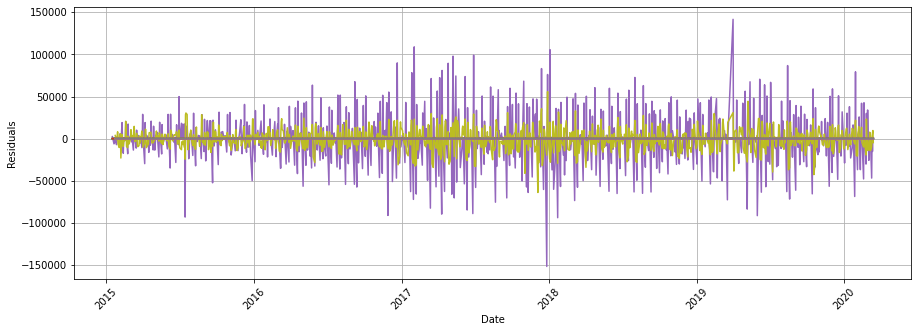

In [299]:
y_fitted = res.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(X_train, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)